## Data Exploration

### Loading and Inspecting the Data



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In the description info above, we see that the data type of "Total Charges" is Object. But, we need it as "float". So, we need to convert that here.

In [35]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


This gives us an initial view of the dataset, including customer demographics, services subscribed, and contract information.

## Data Pre-processing

#### Checking for missing values:

In [38]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We found 11 missing values in the 'TotalCharges' column.

We need to know the reason why the data are missing. So, we need to have a look at the missing values.

See, if Total Charges is missing, one of the reason may be because, the tenure is '0'. Because:

- **Total Charges = Tenure * Monthly Charges**

##### Hence, let's look at the tenure value of the missing Total Charges.

In [39]:
missing_rows = data[data['TotalCharges'].isnull()]
missing_rows['tenure']

488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64

#### Handling missing values

Now, we know the tenure is '0' and that is why the total charges is missing. 

We can fix this by assigning '0.0' as a value to all the missing ones.

In [40]:
data.loc[(data['TotalCharges'].isnull()) & (data['tenure'] == 0), 'TotalCharges'] = 0.0
#If Tenure = 0; TotalCharges = 0

In [41]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Encoding target variable

In [42]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0}) #Converting Churn into Numerical
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## EDA(Exploratory Data Analysis)

### Univariate Analysis

In [43]:
categorical_vars = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for vars in categorical_vars:
    print(data[vars].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [44]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

#### Distribution of numerical variables

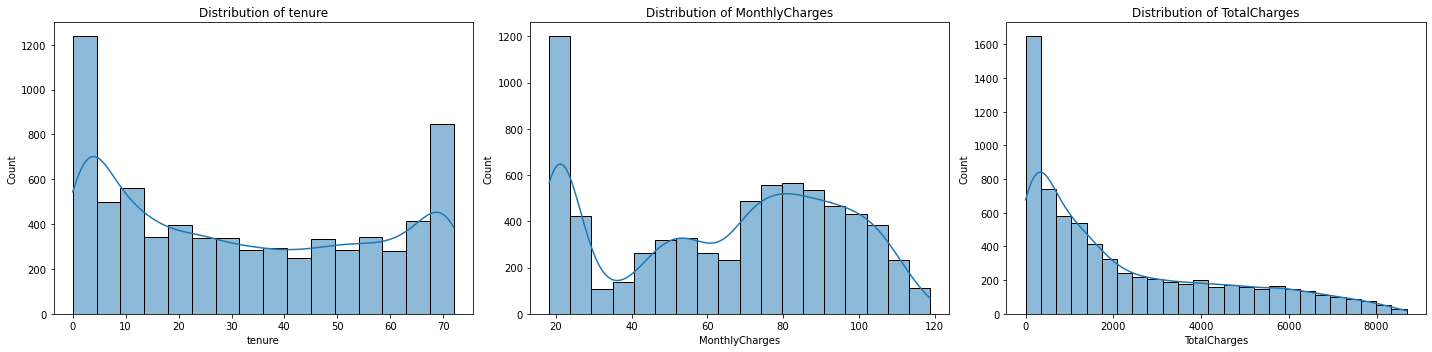

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, var in enumerate(numerical_vars):
    sns.histplot(data[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

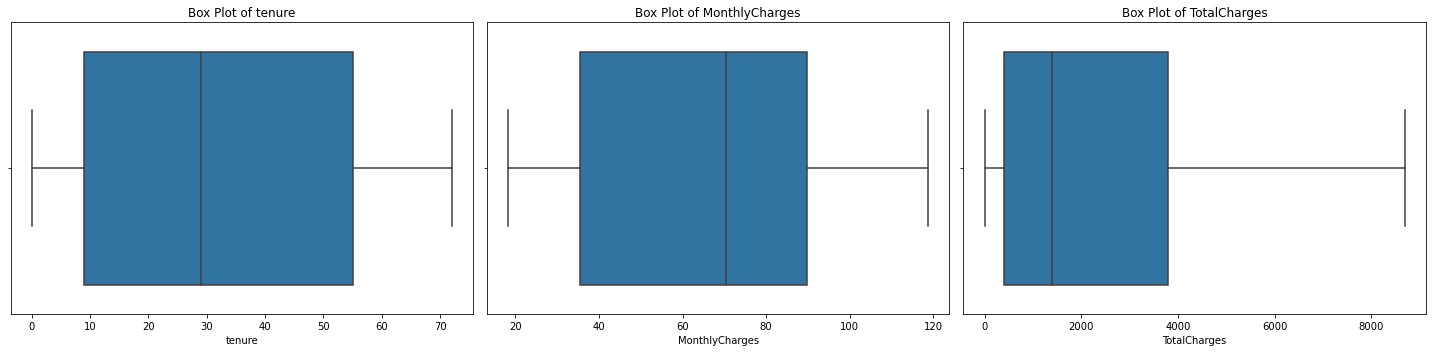

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, var in enumerate(numerical_vars):
    sns.boxplot(x=data[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

In [46]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [47]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


#### Categorical variable analysis

In [48]:
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

In [49]:
print(f"Data columns: {data.columns}")
print(f"Categorical variables: {categorical_vars}")


Data columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Categorical variables: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


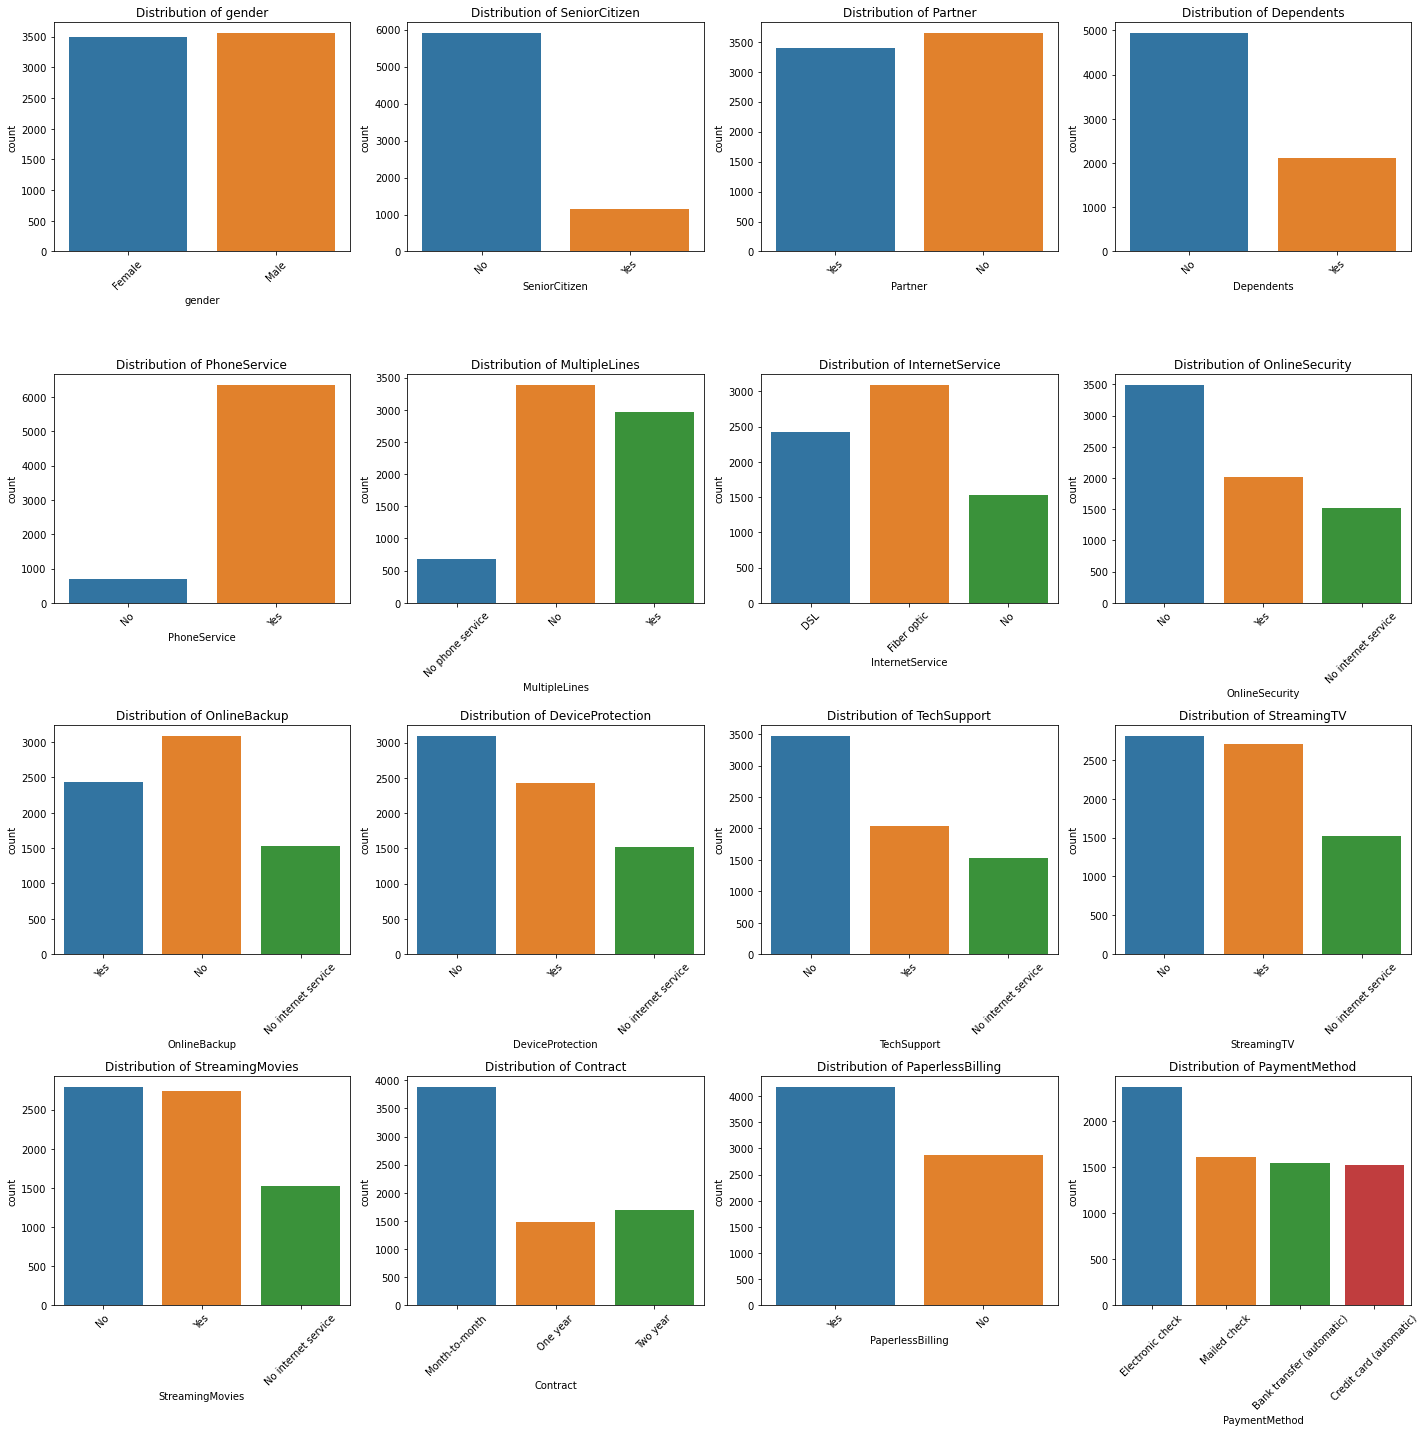

In [50]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()
for i, var in enumerate(categorical_vars):
    if data[var].dropna().empty:
        print(f"Skipping {var} as it is empty or has NaN values.")
        continue
    sns.countplot(x=var, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Numerical Data vs Target Data

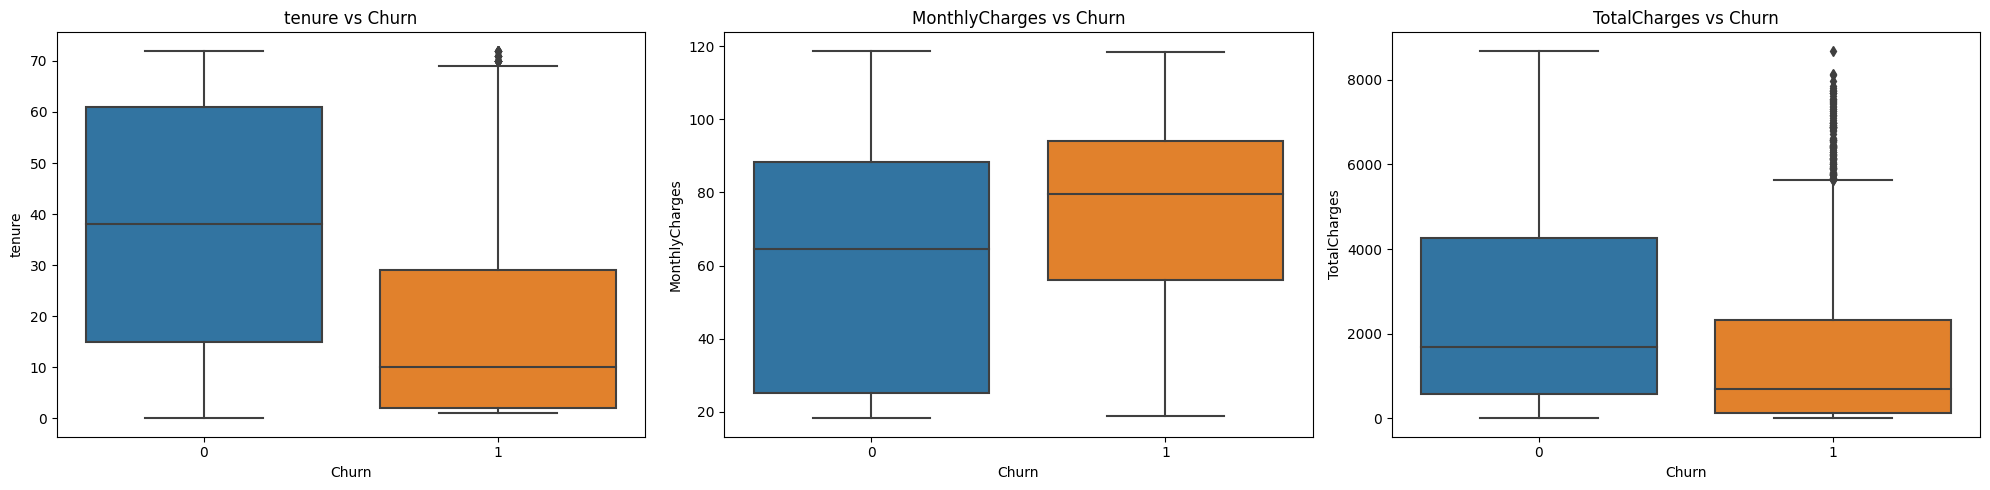

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, var in enumerate(numerical_vars):
    sns.boxplot(x='Churn', y=var, data=data, ax=axes[i])
    axes[i].set_title(f'{var} vs Churn')
plt.tight_layout()
plt.show()

#### Categorical Data vs Target Data

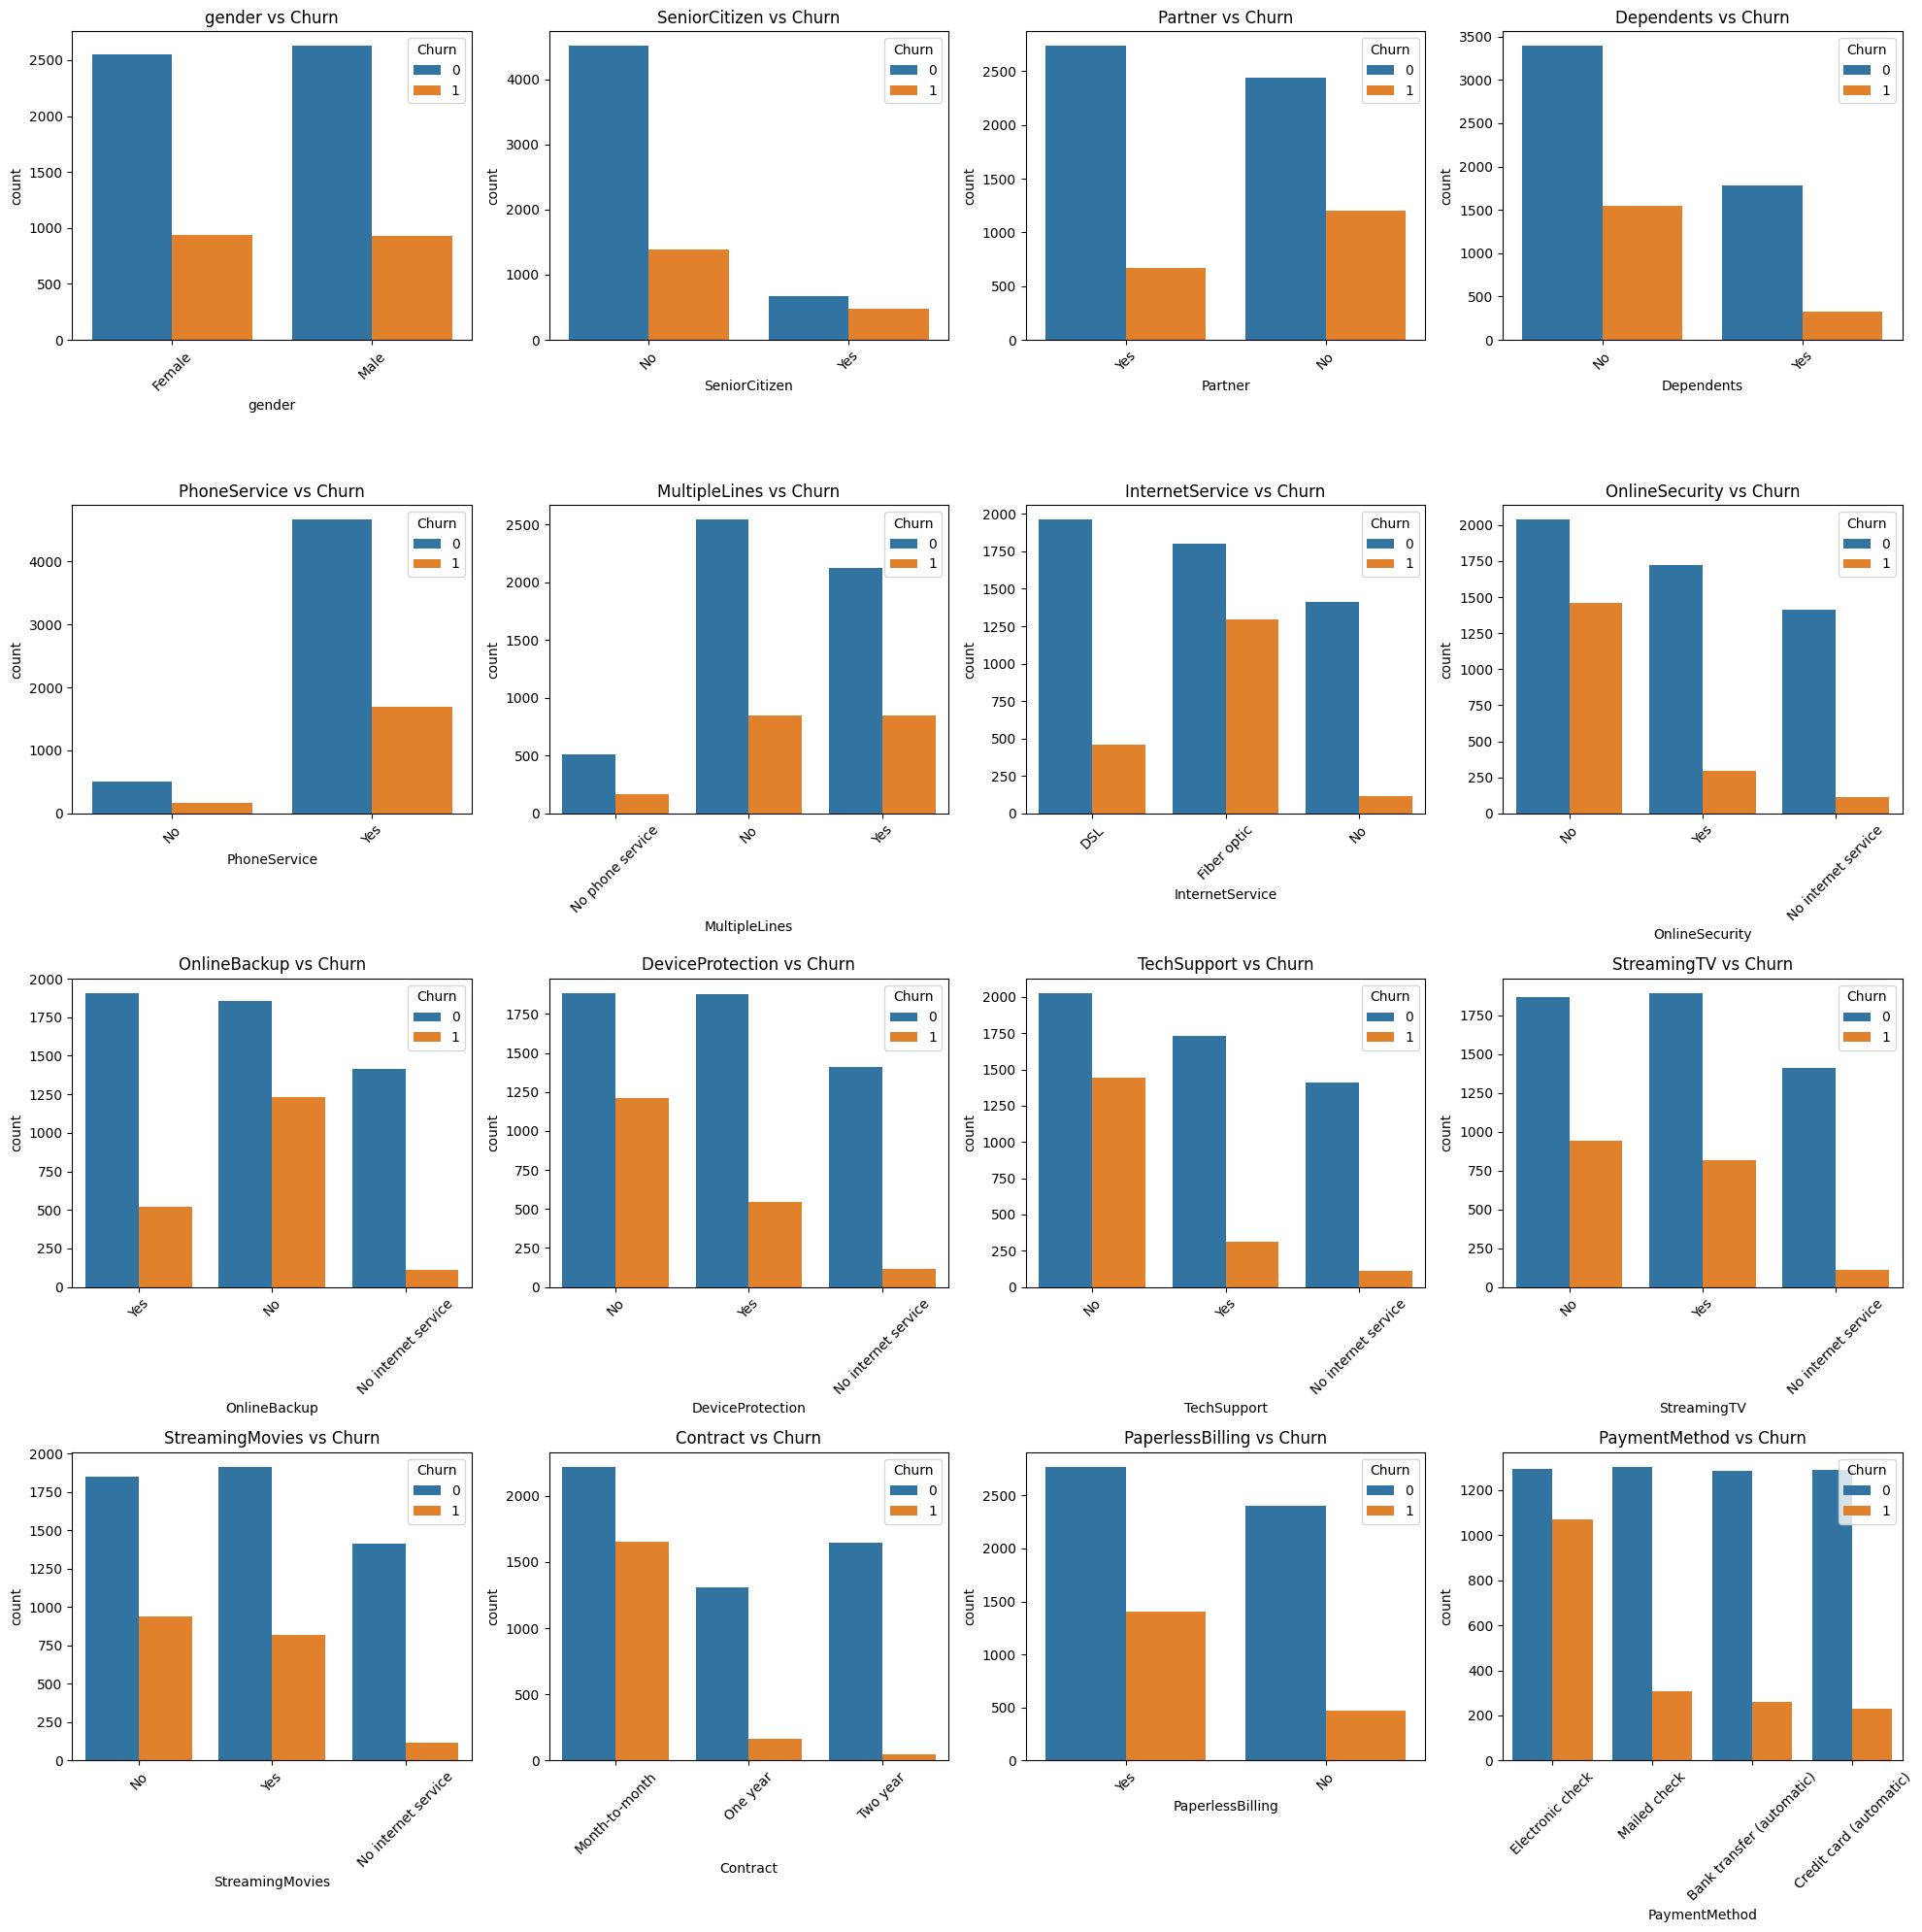

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='Churn', data=data, ax=axes[i])
    axes[i].set_title(f'{var} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Multivariate Analysis

#### Correlation Analysis

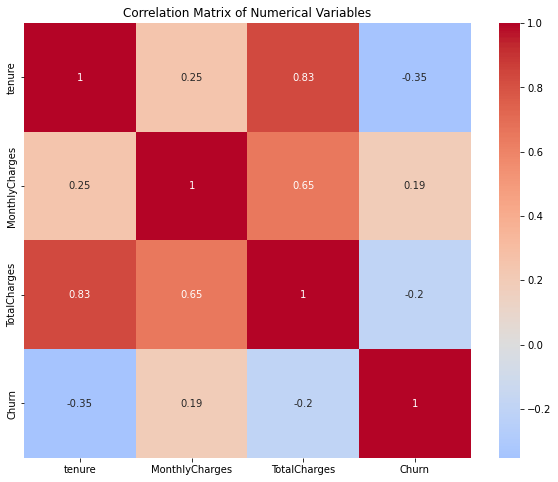

In [51]:
corr_matrix = data[numerical_vars + ['Churn']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [52]:
#Feature Engineering for EDA
data['CLV'] = data['tenure'] * data['MonthlyCharges']

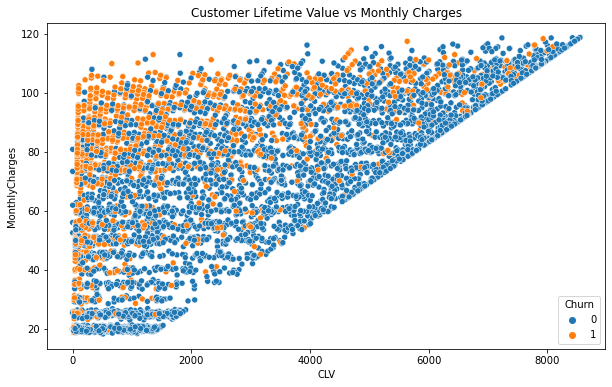

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CLV', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Customer Lifetime Value vs Monthly Charges')
plt.show()

### Domain Knowledge : Churn Rate Analysis

Here, we know in this project, the Churn Rate may be very much affected by its "Contract type" and the "Tenure".

So, Let's have a look at their relationship.


In [54]:
data['TenureBin'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, np.inf], labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5+ Years'])

In [55]:
churn_by_contract_tenure = data.groupby(['Contract', 'TenureBin'])['Churn'].mean().unstack()

<Figure size 864x432 with 0 Axes>

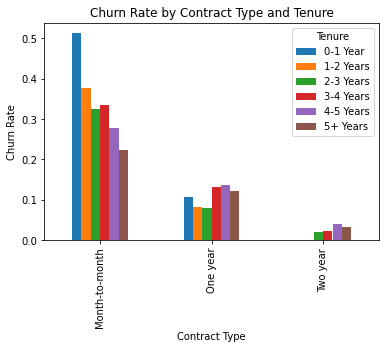

In [56]:
plt.figure(figsize=(12, 6))
churn_by_contract_tenure.plot(kind='bar', stacked=False)
plt.title('Churn Rate by Contract Type and Tenure')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.legend(title='Tenure')
plt.show()

In [57]:
X = data.drop('Churn', axis = 1)
Y = data['Churn']

## Feature preprocessing:

We used ColumnTransformer and Pipeline from scikit-learn to preprocess our features:

1. **Numeric features**: Imputation and StandardScaler
2. **Categorical features**: Imputation and OneHotEncoder

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

In [60]:
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [62]:
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])


In [63]:
preprocessor = ColumnTransformer(transformers = [
    ('num', numeric_transformer, numerical_vars),
    ('cat', categorical_transformer, categorical_vars)
])

In [64]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [65]:
#Getting features names after Processing
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_vars)
feature_names = numerical_vars + list(cat_feature_names)

print(feature_names)

['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [66]:
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns = feature_names)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns = feature_names)

In [67]:
X_train_preprocessed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.465683,-0.000474,-0.419925,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.885537,1.074754,1.256017,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-1.284605,-1.376499,-1.000283,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.161766,0.177346,-0.905497,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.325551,-0.098524,-1.010646,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [68]:
X_test_preprocessed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.284605,-1.331629,-0.999687,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.353238,-1.316672,-0.570322,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.803645,-1.512772,-0.554746,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.284605,0.381756,-0.976907,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.417836,-0.475768,0.429966,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [69]:
X_train_preprocessed.shape

(5634, 30)

In [70]:
X_test_preprocessed.shape

(1409, 30)

## Feature Engineering

We created two new features:

- **Customer Lifetime Value (CLV):** 

CLV = tenure * MonthlyCharges

- **Average Monthly Charges:** 

AvgMonthlyCharges = TotalCharges / tenure

These new features were then scaled using StandardScaler.

In [71]:
def features_engineer(data):
    
    data['CLV'] = data['tenure'] * data['MonthlyCharges']
    
    data['AvgMonthlyCharges'] = data['TotalCharges'] / data['tenure']
    data['AvgMonthlyCharges'].fillna(data['MonthlyCharges'], inplace = True)
    
    return data

In [72]:
X_train = features_engineer(X_train_preprocessed)
X_test = features_engineer(X_test_preprocessed)

In [73]:
#Scaling new numerical features
new_numeric_features = ['CLV','AvgMonthlyCharges']
scaler = StandardScaler()

In [74]:
X_train[new_numeric_features] = scaler.fit_transform(X_train[new_numeric_features])
X_test[new_numeric_features] = scaler.transform(X_test[new_numeric_features])

In [75]:
X_train.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'CLV',
       'AvgMonthlyCharges'],
      dtype='object')

In [76]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,CLV,AvgMonthlyCharges
0,-0.465683,-0.000474,-0.419925,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.254153,0.032816
1,0.885537,1.074754,1.256017,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.699500,0.177446
2,-1.284605,-1.376499,-1.000283,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.517859,-0.001637
3,-1.161766,0.177346,-0.905497,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.460872,-0.001429
4,-1.325551,-0.098524,-1.010646,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.123482,-0.006182


In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 5634 non-null   float64
 1   MonthlyCharges                         5634 non-null   float64
 2   TotalCharges                           5634 non-null   float64
 3   gender_Male                            5634 non-null   float64
 4   SeniorCitizen_Yes                      5634 non-null   float64
 5   Partner_Yes                            5634 non-null   float64
 6   Dependents_Yes                         5634 non-null   float64
 7   PhoneService_Yes                       5634 non-null   float64
 8   MultipleLines_No phone service         5634 non-null   float64
 9   MultipleLines_Yes                      5634 non-null   float64
 10  InternetService_Fiber optic            5634 non-null   float64
 11  Inte

In [104]:
Y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 5634 entries, 2142 to 860
Series name: Churn
Non-Null Count  Dtype
--------------  -----
5634 non-null   int64
dtypes: int64(1)
memory usage: 88.0 KB


## Model Building

We built and compared several classification models:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Support Vector Machine (SVM)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [78]:
def train_and_evaluate(model, X_train, X_test, Y_train, Y_test):
    
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    roc_auc = roc_auc_score(Y_test, y_pred_proba)
    
    cv_scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring='roc_auc')
    
    return {
        'accuracy' : accuracy,
        'precision' : precision,
        'recall' : recall,
        'f1' : f1,
        'roc_auc' : roc_auc,
        'cv_roc_auc_mean' : cv_scores.mean(),
        'cv_roc_auc_std' : cv_scores.std()
    }


In [87]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

In [88]:
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    results[name] = train_and_evaluate(model, X_train, X_test, Y_train, Y_test)

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training SVM...


In [89]:
for name, metrics in results.items():
    print(f"\n {name} Results:")
    for metrics, value in metrics.items():
        print(f"{metrics}: {value: .4f}")


 Logistic Regression Results:
accuracy:  0.8219
precision:  0.6883
recall:  0.5979
f1:  0.6399
roc_auc:  0.8619
cv_roc_auc_mean:  0.8404
cv_roc_auc_std:  0.0111

 Decision Tree Results:
accuracy:  0.7076
precision:  0.4494
recall:  0.4638
f1:  0.4565
roc_auc:  0.6312
cv_roc_auc_mean:  0.6475
cv_roc_auc_std:  0.0148

 Random Forest Results:
accuracy:  0.7999
precision:  0.6667
recall:  0.4879
f1:  0.5635
roc_auc:  0.8401
cv_roc_auc_mean:  0.8255
cv_roc_auc_std:  0.0141

 Gradient Boosting Results:
accuracy:  0.8119
precision:  0.6849
recall:  0.5362
f1:  0.6015
roc_auc:  0.8614
cv_roc_auc_mean:  0.8414
cv_roc_auc_std:  0.0097

 SVM Results:
accuracy:  0.8183
precision:  0.7038
recall:  0.5416
f1:  0.6121
roc_auc:  0.8110
cv_roc_auc_mean:  0.7966
cv_roc_auc_std:  0.0182


## Model Evaluation

We evaluated our models using several metrics:

- Accuracy
- Precision
- Recall
- F1-score
- ROC AUC score

We also performed cross-validation to ensure the robustness of our models.

Additionally, we visualized the performance of our models using:

1. Confusion Matrices
2. ROC curves
3. Precision-Recall curves

Evaluation metrics for Logistic Regression:
Accuracy: 0.8219
Precision: 0.6883
Recall: 0.5979
F1-score: 0.6399
ROC AUC: 0.8619


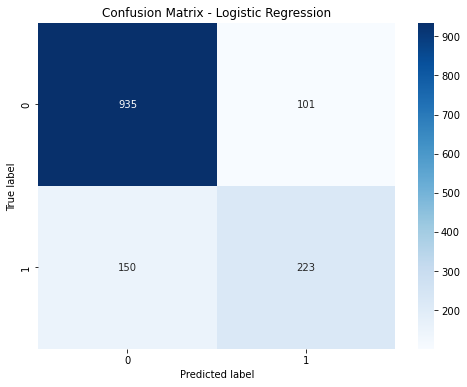

Evaluation metrics for Decision Tree:
Accuracy: 0.7076
Precision: 0.4494
Recall: 0.4638
F1-score: 0.4565
ROC AUC: 0.6312


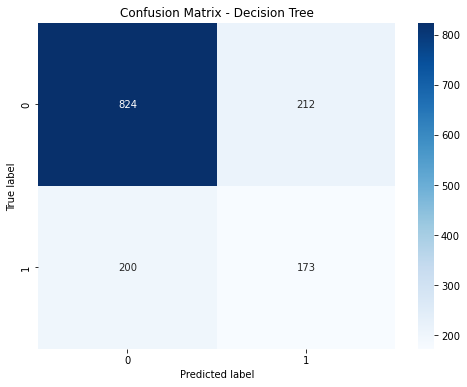

Evaluation metrics for Random Forest:
Accuracy: 0.7999
Precision: 0.6667
Recall: 0.4879
F1-score: 0.5635
ROC AUC: 0.8401


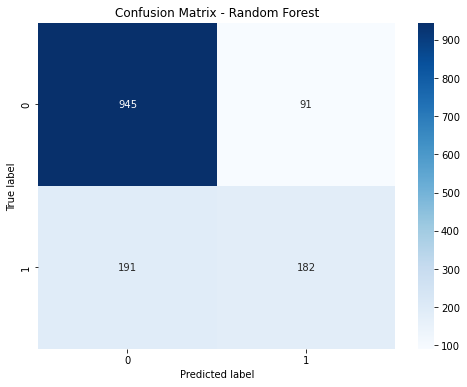

Evaluation metrics for Gradient Boosting:
Accuracy: 0.8119
Precision: 0.6849
Recall: 0.5362
F1-score: 0.6015
ROC AUC: 0.8614


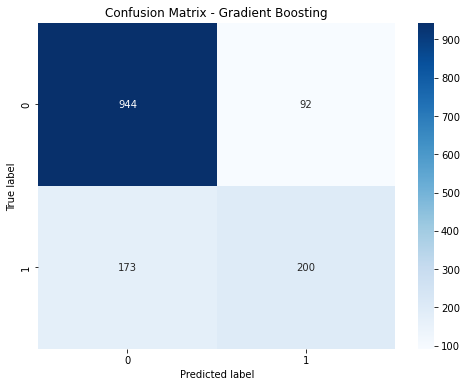

Evaluation metrics for SVM:
Accuracy: 0.8183
Precision: 0.7038
Recall: 0.5416
F1-score: 0.6121
ROC AUC: 0.8110


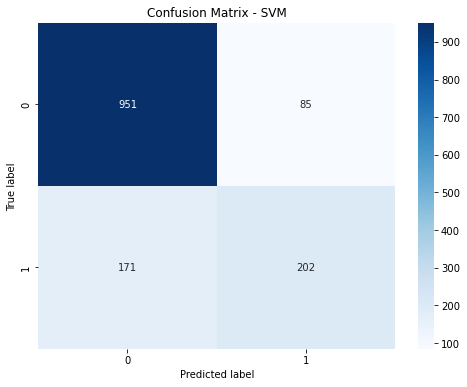

In [90]:
def evaluate_model(model, X, y, name):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    print(f"Evaluation metrics for {name}:")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"Precision: {precision_score(y, y_pred):.4f}")
    print(f"Recall: {recall_score(y, y_pred):.4f}")
    print(f"F1-score: {f1_score(y, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y, y_pred_proba):.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Evaluate models on test set
for name, model in models.items():
    evaluate_model(model, X_test, Y_test, name)

In [91]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from itertools import cycle

In [92]:
def plot_roc_curves(models, X, y):
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green','black','yellow'])
    
    for (name, model), color in zip(models.items(), colors):
        y_pred_proba = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, color=color, lw=2,
                 label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [93]:
def plot_precision_recall_curves(models, X, y):
    plt.figure(figsize=(10, 8))
    colors = cycle(['blue', 'red', 'green','black', 'yellow'])
    
    for (name, model), color in zip(models.items(), colors):
        y_pred_proba = model.predict_proba(X)[:, 1]
        precision, recall, _ = precision_recall_curve(y, y_pred_proba)
        average_precision = average_precision_score(y, y_pred_proba)
        
        plt.plot(recall, precision, color=color, lw=2,
                 label=f'{name} (AP = {average_precision:.2f})')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

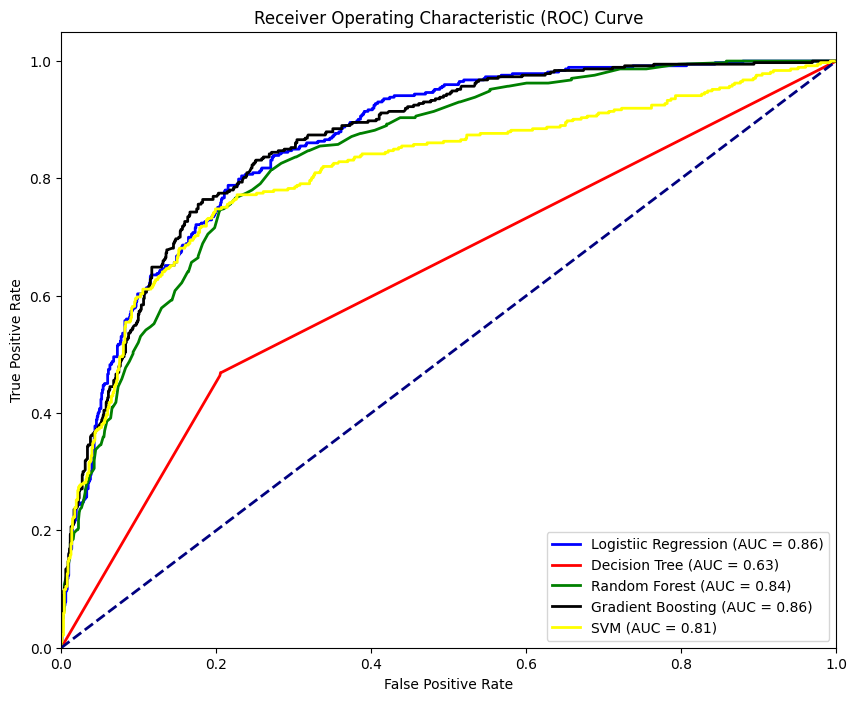

In [56]:
plot_roc_curves(models, X_test, Y_test)

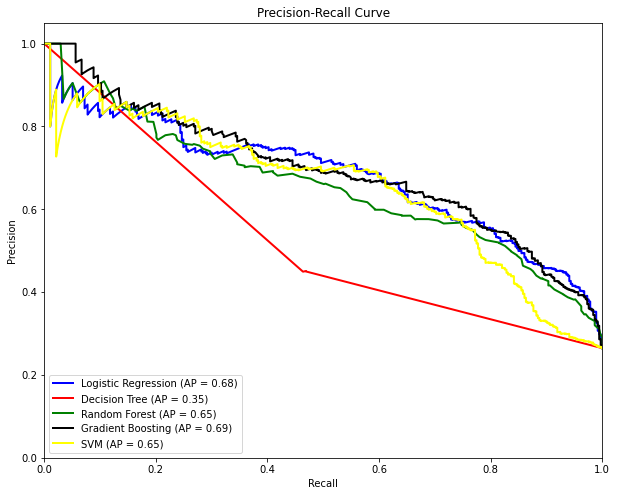

In [94]:
plot_precision_recall_curves(models, X_test, Y_test)

In [95]:
best_model = max(results, key = lambda x: results[x]['roc_auc'])

print(f"\n Best Model: {best_model}")
print(f"Best ROC AUC: {results[best_model]['roc_auc']:.4f}")


 Best Model: Logistic Regression
Best ROC AUC: 0.8619


In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

# Create a Logistic Regression model
log_reg = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Get best parameters
print(grid_search.best_params_)


{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [99]:
best_model = grid_search.best_estimator_

In [100]:
y_pred = best_model.predict(X_test)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(Y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(Y_test, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(Y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(Y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.82
Precision: 0.81
Recall: 0.82
F1 Score: 0.81
Confusion Matrix:
[[936 100]
 [154 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



In [102]:
import pickle

# Save the best model to a file
with open('best_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
